# Trapezoid Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

**Theorem.** Let $T_N(f)$ denote the trapezoid rule

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))
$$

where $\Delta x = (b-a)/N$ and $x_i = a + i \Delta x$. The error bound is

$$
E_N^T(f) = \left| \ \int_a^b f(x) \ dx - T_N(f) \ \right| \leq \frac{(b-a)^3}{12 N^2} K_2
$$

where $\left| \ f''(x) \, \right| \leq K_2$ for all $x \in [a,b]$.

---

## Exercises

**Exercise 1.** Let $f(x) = x^x$ and note that

Plot the function $f''(x)$ and use that information to compute $T_N(f)$ for the integral

$$
\int_1^2 x^x \, dx
$$

such that $E_N^T(f) \leq 10^{-3}$. What is the actual smallest $N$ such that the trapezoid rule gives the estimate of $x^x$ to within $10^{-8}$?

**Exercise 2.** Consider the integral

$$
\int_0^1 \ln(1+x^2) \, dx
$$


Without plotting the functions $f(x)$, $f'(x)$, $f''(x)$ or $f'''(x)$, find a value $N$ such that $E_N^T(f) \leq 10^{-6}$.

**Exercise 3.**: A particle of mass $m$ moving through a fluid is subjected to viscous resistance $R(v)$, where $v$ is the particle's velocity.  Suppose that relationship between the resistance $R$, velocity $v$, and the time of travel is given by 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du, 
$$
where $v_{0} = v(0)$ is the intial velocity of the particle.  Now suppose that 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def trapezoid(f, a, b, N):
    x = np.linspace(a, b, N+1)
    y = f(x)
    dx = (b-a)/N

    y_left = y[:-1] ; y_right = y[1:]
    trap = dx * (y_left + y_right) * 0.5
    area = np.sum(trap)
    return area


f = lambda x:x**2
a = 0; b=1; N=10
trapezoid(f, a, b, N)

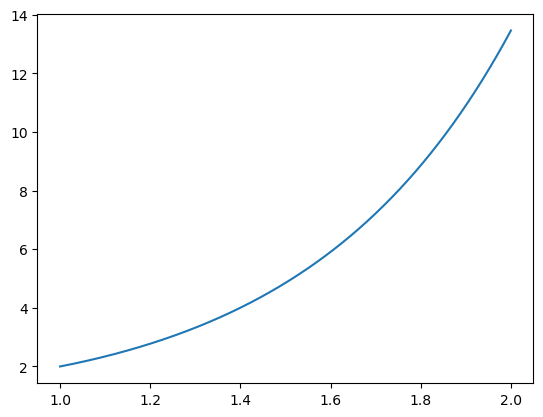

In [9]:
g = lambda x: (x**x)*((1+np.log(x))**2 + 1/x)
x = np.linspace(1, 2, 10000)
y = g(x)
plt.plot(x, y)
plt.show()

In [10]:
g(2)

13.46698950015237

In [33]:
# Setting
f = lambda x:x**x
a = 1; b = 2; N = int((1e3*(g(2)/12)) ** 0.5)
print(N)
approx = trapezoid(f, a, b, N)

33


In [34]:
pseudo = trapezoid(f, a, b, 100000)

In [35]:
np.abs(approx - pseudo) < 1e-3

True

## Exercises

**Exercise 1.** Let $f(x) = x^x$ and note that

Plot the function $f''(x)$ and use that information to compute $T_N(f)$ for the integral

$$
\int_1^2 x^x \, dx
$$

such that $E_N^T(f) \leq 10^{-3}$. What is the actual smallest $N$ such that the trapezoid rule gives the estimate of $x^x$ to within $10^{-8}$?

**Exercise 2.** Consider the integral

$$
\int_0^1 \ln(1+x^2) \, dx
$$


Without plotting the functions $f(x)$, $f'(x)$, $f''(x)$ or $f'''(x)$, find a value $N$ such that $E_N^T(f) \leq 10^{-6}$.

**Exercise 3.**: A particle of mass $m$ moving through a fluid is subjected to viscous resistance $R(v)$, where $v$ is the particle's velocity.  Suppose that relationship between the resistance $R$, velocity $v$, and the time of travel is given by 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du, 
$$
where $v_{0} = v(0)$ is the intial velocity of the particle.  Now suppose that 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

In [41]:
R = lambda x: 1/(- 3*((2/(1+np.exp((-x**2)*0.25))-1)))


In [43]:
trapezoid(R, 10, 5, 10000000)

1.667148015422322

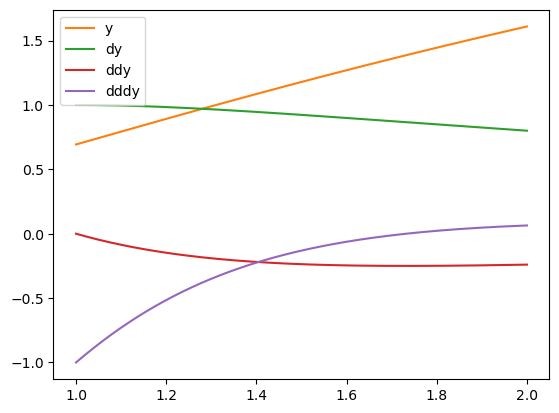

In [45]:
T = lambda x : np.log(1+x**2)
dT = lambda x: 2*x/(1+x**2)
ddT = lambda x: - 2*(x**2-1)/(1+x**2)**2
dddT = lambda x: 4*x*(x**2-3)/((1+x**2)**3)
y = T(x); dy = dT(x) ; ddy = ddT(x) ; dddy = dddT(x)
plt.plot(x,y, label='y', color = 'C1')
plt.plot(x, dy, label= 'dy', color ='C2')
plt.plot(x, ddy, label='ddy', color = 'C3')
plt.plot(x, dddy, label='dddy', color = 'C4')
plt.legend()
plt.show()